<a href="https://colab.research.google.com/github/sanskruti-1234/Deep-Learning/blob/main/Practical_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
input_img = Input(shape=(28, 28, 1))

# --- Encoder ---
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)   # -> 7x7x64 compressed feature map

# --- Decoder ---
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Combine into model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

In [4]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=15,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 191s 801ms/step - loss: 0.3728 - val_loss: 0.2804
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 187s 796ms/step - loss: 0.2769 - val_loss: 0.2735
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 198s 844ms/step - loss: 0.2703 - val_loss: 0.2698
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 194s 809ms/step - loss: 0.2675 - val_loss: 0.2669
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 186s 791ms/step - loss: 0.2646 - val_loss: 0.2647
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 186s 793ms/step - loss: 0.2611 - val_loss: 0.2620
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 192s 818ms/step - loss: 0.2596 - val_loss: 0.2602
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 188s 801ms/step - loss: 0.2584 - val_loss: 0.2590
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 188s 800ms/step - loss: 0.2566 - val_loss: 0.2592
Epoch 10/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 186s 793ms/step - loss: 0.2557 - val_loss: 0.2575
Epoch 11/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 180s 765ms/step - loss: 0.2556 - val_loss: 0.2566
Epoch 12

In [5]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


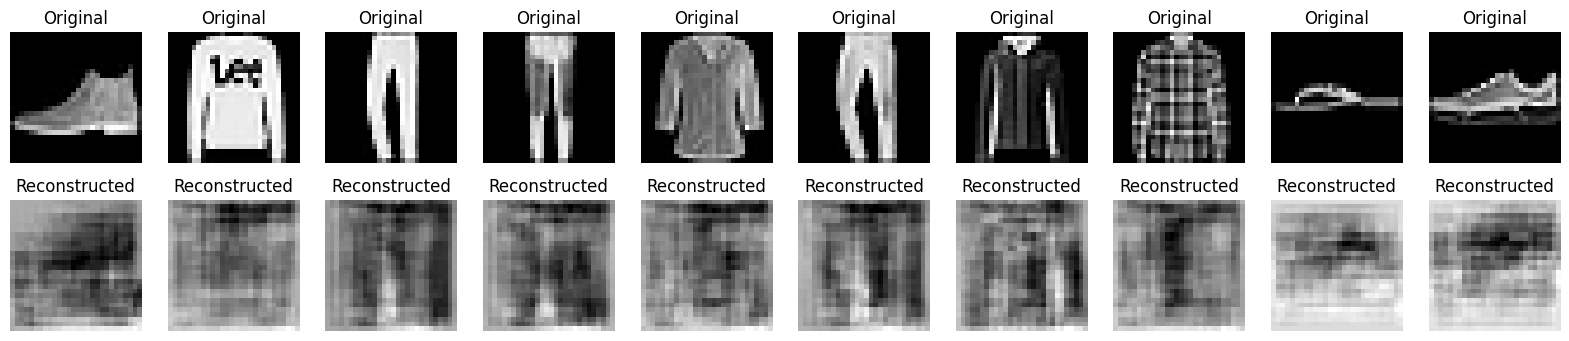

In [6]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

In [7]:
encoder = Model(input_img, encoded)
encoded_features = encoder.predict(x_test)
print("Encoded feature shape:", encoded_features.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Encoded feature shape: (10000, 7, 7, 64)
